In [1]:
import pandas as pd
from preprocessing import Preprocessor
from network import RNN

In [2]:
pp = Preprocessor(train_path="datasets/no1_train.csv", val_path="datasets/no1_validation.csv")
train_df, val_df, X_feat = pp.preprocess()

In [3]:
seq_len = 144
num_feat = len(X_feat)
rnn = RNN(seq_len=seq_len, num_feat=num_feat)

2022-04-25 14:36:40.613144: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-25 14:36:40.615535: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-25 14:36:40.616828: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [4]:
train_X = pp.df_to_x(train_df[X_feat], seq_len=seq_len)
train_Y = pp.df_to_y(train_df["y"], seq_len=seq_len)
val_X = pp.df_to_x(val_df[X_feat], seq_len=seq_len)
val_Y = pp.df_to_y(val_df["y"], seq_len=seq_len)


In [5]:
# Maybe change batch_size to make training go faster
rnn.train_model(train_X,
                train_Y,
                validation_data=(val_X, val_Y),
                epochs=20,
                batch_size=32)

# rnn.load_model("models/model_seq144_epochs10_batch32")

Epoch 1/20


2022-04-25 14:38:00.404726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-25 14:38:01.038584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-25 14:38:01.629272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-25 14:38:02.233800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-25 14:38:03.108189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  85/7021 [..............................] - ETA: 17:26 - loss: 0.0895

KeyboardInterrupt: 

2022-04-25 14:31:53.747050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-25 14:31:53.905998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-25 14:31:54.134223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


pred: [[-0.47267404]]
y: -0.5357074316373438
pred: [[-0.47268018]]
y: -0.315314122664864
pred: [[-0.47271386]]
y: -0.1607247720576787
pred: [[-0.47274005]]
y: -0.3368680940728908
pred: [[-0.47281364]]
y: -0.4166328599023562
pred: [[-0.47274747]]
y: -0.39098645475103994


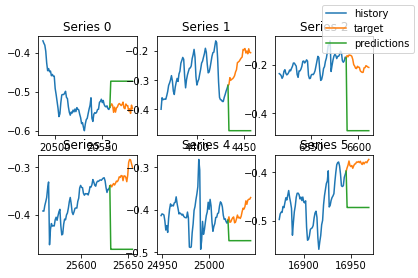

In [ ]:
rnn.predict_multiple_series(x=val_X,
                                y=val_Y,
                                start=0,
                                steps_ahead=24,
                                num_series=6,
                                random_series=True)